# Recommender System for Board Games from [BoardGameGeek.com](https://boardgamegeek.com/)



1.   Iatrou Manos
2.   Papageorgiou Vasileios
3. Sykianakis Xaralambos




# Dataset Description



*   Games File
*   User Ratings File
*   Mechanics File
*   Themes File



In [1]:
import pandas as pd
import numpy as np
import os
import glob
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# List of CSV file paths or filenames
# csv_files = ['games.csv', 'mechanics.csv', 'themes.csv','user_ratings.csv']

games = pd.read_csv('games.csv')
mechanics =  pd.read_csv('mechanics.csv')
themes =  pd.read_csv('themes.csv')
user_ratings =  pd.read_csv('user_ratings.csv')

In [3]:
columns_to_keep = ['BGGId', 'YearPublished', 'GameWeight','NumWish','MfgPlaytime','MfgAgeRec','NumAlternates','NumExpansions','NumImplementations','Kickstarted',
                   'Cat:Thematic','Cat:Strategy','Cat:War','Cat:Family','Cat:CGS','Cat:Abstract','Cat:Party','Cat:Childrens']

In [4]:
games = games[columns_to_keep]

In [5]:
merged_df = pd.merge(games, mechanics, on='BGGId')
games = pd.merge(merged_df, themes, on='BGGId')

In [6]:
from sklearn.preprocessing import LabelEncoder

column_to_encode = 'Username'
label_encoder = LabelEncoder()
user_ratings[column_to_encode] = label_encoder.fit_transform(user_ratings[column_to_encode])

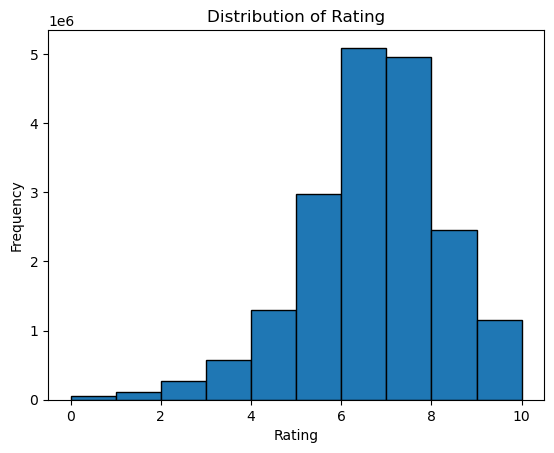

In [7]:
your_column = 'Rating'

plt.hist(user_ratings[your_column], bins=10, edgecolor='black')
plt.title(f'Distribution of {your_column}')
plt.xlabel(your_column)
plt.ylabel('Frequency')
plt.show()

In [8]:
user_ratings['sentiment'] = user_ratings['Rating'].apply(lambda x: 0 if x <= 5 else (1 if x <= 8 else 2))

In [9]:
user_ratings = user_ratings.drop('Rating', axis=1)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

percentage_to_keep = 10

num_rows_to_keep = int(len(user_ratings) * (percentage_to_keep / 100))
user_ratings_subset = user_ratings.sample(n=num_rows_to_keep, random_state=42)
merged_df = pd.merge(user_ratings_subset, games, on='BGGId')
X = merged_df.drop(['BGGId', 'sentiment'], axis=1)
y = merged_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

C:\Users\xaris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6879937705394027
